* #################################################
* 2025 공공데이터분석 중간고사 금요일반 2025.04.25 (금)
* #################################################

In [1]:
##################################################
############### 문제 풀기 전 주의사항 ##############
##################################################

# 시험시간 내 인터넷 사용 금지, 시험문제 다운로드, 업로드 시에만 가능
# (시험 중, 핸드폰이나 인터넷 사용을 포함한 부정행위 적발시 0점 처리).

# 캔버스에서 1) ipynb 시험파일, 2) html 시험파일, 3) 데이터를 다운로드.
 
# html 파일의 실행결과를 참고하여, ipynb 파일의 #=== 코드작성 ===# 부분에 코드를 작성
# (ipynb파일의 실행결과는 코드 작성과정에서 사라질 수 있음).

# 맨 위의 import 셀을 우선 실행.
# 랜덤 값을 입력으로하는 문제는 주어진 실행결과와 다른 실행결과가 나올 수 있음.

# 코드는 다른 값을 갖는 데이터에서도 동작을 해야만 정답으로 인정
# (주어진 데이터 값 자체를 가지고 결과를 만들면 오답 처리)

# 시험 도중 anaconda prompt (검은창) 지우지 말것.
# 시험 중간중간에 파일 저장 (crtl+s) 할 것.

# 시험이 끝나면 실행결과를 모두 확인하고 작성한 ipynb 파일 저장 후,
# 작성한 ipynb을  ( 캔버스 --> 과제 --> 중간고사 ) 에 업로드.
# (시스템 문제로 캔버스제출이 아닌 이메일로 제출하는 경우 ipynb 시험 파일은 파일명 수정하여 제출:
#    --> 이름_학번_중간.ipynb)

In [21]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
plt.rc("font", family="Malgun Gothic") # window
#plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

python 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
numpy 2.1.3
pandas 2.2.3
matplotlib 3.10.0
seaborn 0.13.2


# df_2023 전처리코드 정리 (최종)

In [22]:
####### df_2023 전처리하기
df_2023 = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','
df_2023.head()
df_2023.info()

### ==> 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_2023_nn=df_2023.loc[df_2023['분양가격(제곱미터)'].notnull()]

# ### ==> 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형 | 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_2023_ft=df_2023_nn.copy()
df_2023_ft['분양가격(제곱미터)']=pd.to_numeric(df_2023_ft['분양가격(제곱미터)'], errors='coerce')
df_2023_ft=df_2023_ft.loc[df_2023_ft['분양가격(제곱미터)'].notnull()]

### ==> 3) '분양가격(제곱미터)'을  '평당분양가격'으로 변환하기 (단 column이름은 '분양가격') (참고: 3w자료에서는 평당분양가격임)
df_2023_ft["분양가격"]=df_2023_ft['분양가격(제곱미터)'] * 3.3
df_prep=df_2023_ft.drop(columns=['분양가격(제곱미터)'])

### ==> 4) '규모구분'을 '전용면적'으로 변환하기
def parse_area_only(x):
    x2=x.replace("모든면적", "전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3
    
df_prep["전용면적"] = df_prep["규모구분"].map(parse_area_only)
df_prep=df_prep.drop(columns=['규모구분'], errors='ignore') # '규모구분' column이 없는 경우 error raise 방지

## ==> 5) reset_index 후 전처리한 데이터 확인하기
df_prep=df_prep.reset_index(drop=True)

df_prep.head()
df_prep.info()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     7322 non-null   object 
 1   연도      7322 non-null   int64  
 2   월       7322 non-null   int64  
 3   분양가격    7322 non-null   float64
 4   전용면적    7322 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 286.1+ KB


# df_2015 전처리코드 정리 (최종)

In [23]:
df_2015 = pd.read_csv("data/전국평균 분양가격 (2013년12월~2015년8월).csv", encoding="cp949")
df_2015_melt = df_2015.melt(id_vars="지역", var_name="기간", value_name="분양가격")
df_2015_melt.rename(columns={'지역':"지역명"}, inplace=True)

df_2015_melt['연도']=df_2015_melt['기간'].str.split('년').str.get(0).astype(int)
df_2015_melt['월']=df_2015_melt['기간'].str.split('년').str.get(1).str[:-1].astype(int)

df_2015_prep=df_2015_melt.drop(columns='기간')
df_2015_prep.head()

,지역명,분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


# 문제1
* df1에는 20명 학생의 점수가 있는데 몇몇 학생의 점수는 비어있다 (결측치).
* 이 결측치를 학생들의 평균 점수로 채운 series를 출력하시오
* (힌트: Series에서 mean함수를 수행하면 np.nan은 없는것으로 하고 평균을 구함)

In [24]:
df1=pd.read_table('data/fri_dat_1.txt', sep='\t')
df1

## 코드 작성 ##
df1['score'] = df1['score'].fillna(df1['score'].mean())
df1

,st_num,score
0,1,20.0
1,2,NaN
2,3,20.0
3,4,30.0
4,5,NaN
5,6,30.0
6,7,NaN
7,8,20.0


,st_num,score
0,1,20.0
1,2,24.0
2,3,20.0
3,4,30.0
4,5,24.0
5,6,30.0
6,7,24.0
7,8,20.0


# 문제2
* 주어진 df2에서 "group"별로 score의 합을 구하시오

In [26]:
df2=pd.DataFrame({'group':list('AAPPSSPPPSA'), 'value':[ 9, 12, 13, 7, 6, 7, 10, 2, 1, 2, 1]})
df2

## 코드작성 ##
df2.groupby('group')['value'].sum()

,group,value
0,A,9
1,A,12
2,P,13
3,P,7
4,S,6
5,S,7
6,P,10
7,P,2
8,P,1
9,S,2


group
A    22
P    33
S    15
Name: value, dtype: int64

# 문제3
* dataframe df3에서 col1별, col2별로 val1 값중 "5이상"인 값들의 "합"을 구하시오
* (조건, 결과와 같이 single index dataframe으로 나타내시오)

In [27]:
df3=pd.DataFrame({'col1':list('aaaabbaaabbbaaa'),
                  'col2':list('112211112222133'),
                  'val1':[ 3, 12, 13, 7, 6, 9, 10, 2, 1, 14, 0, 4, 5, 8, 11]})
df3

## 코드작성 ##
def func1(sr):
    sr[sr>=5].sum()
df3.loc[df3['val1']>=5].pivot_table(columns='col2', index='col1', values='val1', aggfunc='sum')

,col1,col2,val1
0,a,1,3
1,a,1,12
2,a,2,13
3,a,2,7
4,b,1,6
5,b,1,9
6,a,1,10
7,a,1,2
8,a,2,1
9,b,2,14


col2,1,2,3
col1,,,
a,27.0,20.0,19.0
b,15.0,14.0,NaN


# 문제4
* df_2015_prep를 가지고 ax1에 seaborn을 사용하여 그림을 그렸다.
* ax2에 pivot_table과 pandas plot을 활용하여 동일한 그림을 그리시오
* (조건: pivot_table 사용)

<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='연도'>

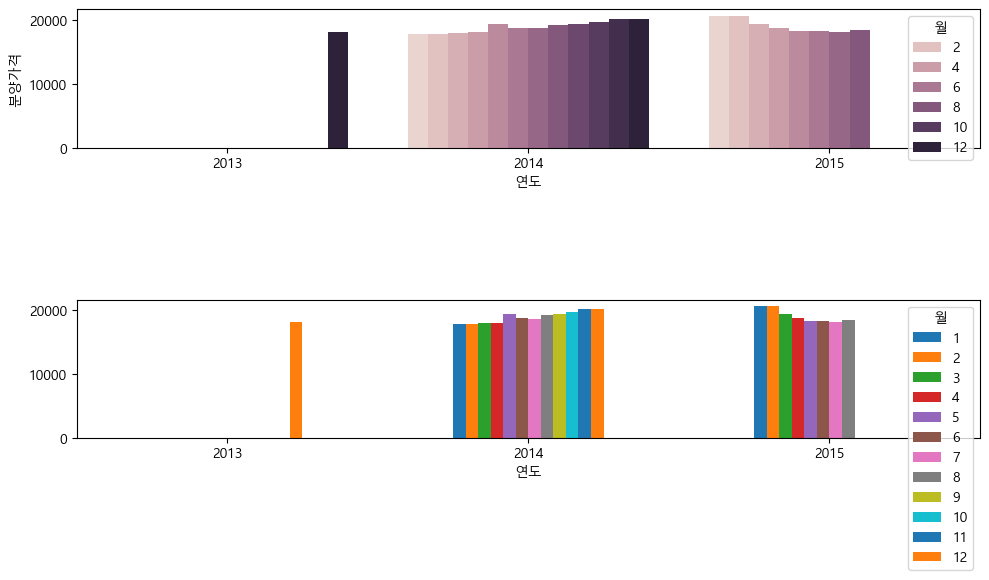

In [28]:
fig=plt.figure(figsize=(10,5))
ax1, ax2 = fig.subplots(2,1)

## ax1
sns.barplot(data=df_2015_prep, x="연도", y="분양가격", hue='월', estimator='max', errorbar=None, ax=ax1)

## ax2
## 코드작성 ##
df_2015_prep.pivot_table(index='연도', columns='월', values='분양가격', aggfunc='max').plot.bar(ax=ax2, rot=0)
fig.tight_layout()

# 문제5
* df_prep를 가지고 seaborn 함수를 사용하여 연도별 분양가격의 "(평균값-중앙값)"를 bargraph로 그리시오
* get_diff() 함수를 활용하시오 <== (평균값-중앙값)
* (조건1: (평균값-중앙값)이 큰 연도에서 작은 연도 순으로 그리시오)
* (힌트1: "esitimator" parameter에 직접 정의한 함수도 사용가능)

<Axes: xlabel='연도', ylabel='분양가격'>

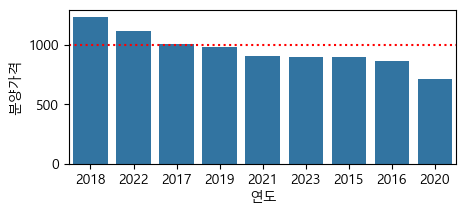

In [29]:
fig=plt.figure(figsize=(5,2))
ax1 = fig.subplots()

def get_diff(sr1):
    return sr1.mean()-sr1.median()

## 코드작성 ##
sr = df_prep.groupby('연도')['분양가격'].apply(get_diff).sort_values(ascending=False)
def getget(n):
    return np.mean(n) - np.median(n)
sns.barplot(data=df_prep, x='연도', y='분양가격', estimator=getget, errorbar=None, order=sr.index, ax=ax1)
ax1.axhline([1000], c='r', ls=':')

# 문제6
* df6의 v1 column에서 a값만 따로 골라서 새로운 'a' 컬럼에 추가한 df6을 출력하시오
* (주의: 코딩한 df6.info를 출력해봤을 때, 'a'컬럼의 타입은 int 이어야 함)

In [30]:
df6=pd.DataFrame({'v1':['a=1 & b=2','a=3 & b=4','a=5 & b=6','a=10 & b=20','a=333 & b=444']})
df6

## 코드작성
li = []
for i in df6['v1'].str.split(' & '):
    li.append(int(i[0].split('=')[1]))
df6['a'] = li
df6
df6.info()

,v1
0,a=1 & b=2
1,a=3 & b=4
2,a=5 & b=6
3,a=10 & b=20
4,a=333 & b=444


,v1,a
0,a=1 & b=2,1
1,a=3 & b=4,3
2,a=5 & b=6,5
3,a=10 & b=20,10
4,a=333 & b=444,333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5 non-null      object
 1   a       5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


# 문제7
* dataframe df7a를 적절하게 변형한 후, df7b와 합쳐서 df7을 만드시오

In [31]:
df7a = pd.DataFrame({"name": ['A','B','C'],
                      "age": [60, 70, 80],
                      "mat": [10, 20, 30],
                      "eng": [20, 30, 30],
                      "kor": [10, 20, 30]})

df7b = pd.DataFrame({"age": [10,20,30,10,20,30],
                      "name": ['D','E','F','D','E','F'],
                      "(eng|mat)": ['eng','eng','eng','mat','mat','mat'],
                      "score": [10, 20, 30, 40, 50, 60]})

df7a
df7b

## 코드작성
dfa = df7a.melt(id_vars=['name', 'age'], value_vars=['mat', 'eng'], var_name='(eng|mat)', value_name='score')
df7 = pd.concat([dfa, df7b]).reset_index(drop=True)
df7

,name,age,mat,eng,kor
0,A,60,10,20,10
1,B,70,20,30,20
2,C,80,30,30,30


,age,name,(eng|mat),score
0,10,D,eng,10
1,20,E,eng,20
2,30,F,eng,30
3,10,D,mat,40
4,20,E,mat,50
5,30,F,mat,60


,name,age,(eng|mat),score
0,A,60,mat,10
1,B,70,mat,20
2,C,80,mat,30
3,A,60,eng,20
4,B,70,eng,30
5,C,80,eng,30
6,D,10,eng,10
7,E,20,eng,20
8,F,30,eng,30
9,D,10,mat,40


# 문제8
* 주어진 df_prep2를 활용하여, 연도별 분양가격 평균 그래프를 그렸다 (errorbar=None)
* 분양가격의 errorbar(upper: 최대 분양가격, lower: 최소 분양가격)를 추가하시오

,지역명,연도,월,분양가격,전용면적
4033,서울,2020,1,26799.3,전체
4034,서울,2020,1,27489.0,~60
4035,서울,2020,1,26845.5,60~85
4036,서울,2020,1,42002.4,85~102
4037,서울,2020,1,28970.7,102~


<Axes: xlabel='연도', ylabel='분양가격'>

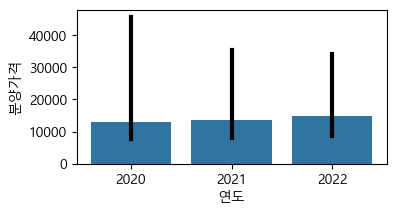

In [32]:
fig=plt.figure(figsize=(4, 2))
ax1=fig.subplots()
df_prep2=df_prep.loc[df_prep['연도'].isin([2020, 2021, 2022])]
df_prep2.head()

sns.barplot(data=df_prep2,
            x='연도', # group
            y="분양가격",
            errorbar=None,
            ax=ax1)

## 코드작성
def error_bar(sr):
    return pd.Series([sr.max(), sr.min()], index=['up', 'lw'])

df_uplw = df_prep2.groupby('연도')['분양가격'].apply(error_bar).unstack()

for x_pos, ind in zip(ax1.get_xticks(), df_uplw.index):
    x = [x_pos, x_pos]
    y = [df_uplw.loc[ind, 'lw'], df_uplw.loc[ind, 'up']]
    ax1.plot(x, y, color='k', linewidth=3)

# 문제9
* 주어진 df_prep 데이터를 가지고, seaborn 함수를 활용하여 아래와 같은 boxplot을 그리시오
* (주의: xtick과 legend의 값의 순서가 일치해야 함)

<Axes: xlabel='월', ylabel='분양가격'>

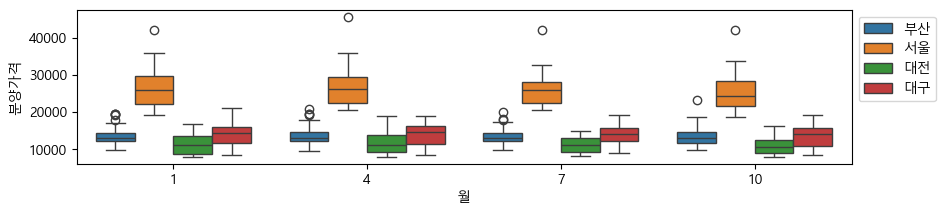

In [33]:
fig=plt.figure(figsize=(10, 2))
ax1=fig.subplots()

## 코드작성
month_list = [1, 4, 7, 10]
city_list = ['부산', '서울', '대전', '대구']
df_month_city = df_prep.loc[(df_prep['월'].isin(month_list)) & (df_prep['지역명'].isin(city_list))]
sns.boxplot(data=df_month_city, x='월', y='분양가격', hue='지역명', ax=ax1, hue_order = city_list)
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

# 문제10
* 주어진 df_prep 데이터를 가지고, pandas plot을 활용하여 지역별로 분양가격의 boxplot을 그리는데,
* 중앙값이 큰 지역 5개에 대해서 내림차순으로 그리시오
* (조건: pandas plot box 사용)

<Axes: >

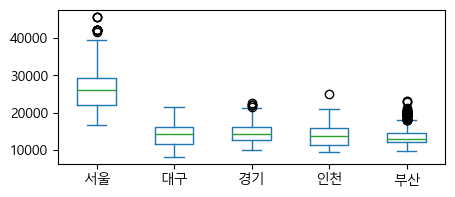

In [15]:
fig=plt.figure(figsize=(5,2))
ax1= fig.subplots()

## 코드작성
sorted_df = df_prep.groupby('지역명')['분양가격'].median().sort_values(ascending=False)[:5]
df_conc = pd.DataFrame()
for n in sorted_df.index:
    sr = df_prep.loc[df_prep['지역명']==n, '분양가격'].reset_index(drop=True)
    sr.name = n
    df_conc = pd.concat([df_conc, sr], axis=1)
df_conc.plot.box(ax=ax1)

# 문제11
* 주어진 df_2015_prep 데이터를 가지고,
* pandas plot 사용하여,
* 아래와 같이 연도별로 min, median, mean, max에 대한 다중 bar그래프를 그리시오

<Axes: xlabel='연도'>

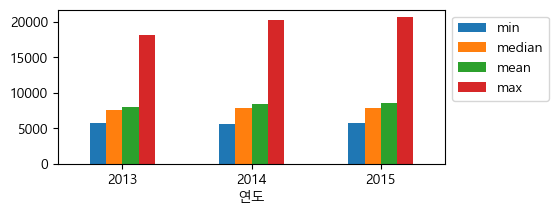

In [20]:
fig=plt.figure(figsize=(5,2))
ax1= fig.subplots()

## 코드작성
def func1(sr):
    return pd.Series([sr.min(), sr.median(), sr.mean(), sr.max()], index=['min', 'median', 'mean', 'max'])
df_2015_prep.groupby('연도')['분양가격'].apply(func1).unstack().plot.bar(ax=ax1, rot=0)
_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')